In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:

# Reading the text file
with open('/content/NPKTMNDU.txt', 'r') as file:
    lines = file.readlines()

# Extracting the data
data = []
for line in lines:
    line = line.strip().split()
    month = int(line[0])
    day = int(line[1])
    year = int(line[2])
    temperature = float(line[3])
    date = f'{year}-{month:02d}-{day:02d}'  # Format date as yyyy-mm-dd
    data.append([date, temperature])

# Creating a pandas DataFrame
df = pd.DataFrame(data, columns=['date', 'temperature'])

# Print the DataFrame
print(df)

            date  temperature
0     1995-01-02         42.8
1     1995-01-03         44.0
2     1995-01-04         48.5
3     1995-01-05         48.3
4     1995-01-06         47.2
...          ...          ...
9260  2020-05-09         69.9
9261  2020-05-10         65.6
9262  2020-05-11         65.7
9263  2020-05-12         69.4
9264  2020-05-13         67.4

[9265 rows x 2 columns]


In [20]:
df_tail = df.tail(200)

In [ ]:
df_tail.head()

,date,temperature
9065,2019-10-27,63.6
9066,2019-10-28,62.9
9067,2019-10-29,63.4
9068,2019-10-30,63.7
9069,2019-10-31,63.6


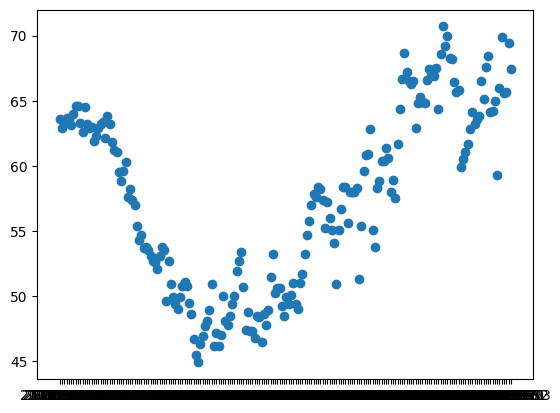

In [21]:
plt.scatter(df_tail["date"],df_tail["temperature"])

In [24]:
ewma_data_1 = df_tail["temperature"].ewm(alpha = 0.9).mean()
ewma_data_2 = df_tail["temperature"].ewm(alpha = 0.5).mean()
ewma_data_3 = df_tail["temperature"].ewm(alpha = 0.3).mean()

In [25]:
ewma_data_1

9065    63.600000
9066    62.963636
9067    63.356757
9068    63.665707
9069    63.606570
          ...    
9260    69.448623
9261    65.984862
9262    65.728486
9263    69.032849
9264    67.563285
Name: temperature, Length: 200, dtype: float64

In [26]:
df_tail["ewma_temp_1"] = ewma_data_1
df_tail["ewma_temp_2"] = ewma_data_2
df_tail["ewma_temp_3"] = ewma_data_3
df_tail

<ipython-input-26-c79cbc9a538a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tail["ewma_temp_1"] = ewma_data_1
<ipython-input-26-c79cbc9a538a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tail["ewma_temp_2"] = ewma_data_2
<ipython-input-26-c79cbc9a538a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,date,temperature,ewma_temp_1,ewma_temp_2,ewma_temp_3
9065,2019-10-27,63.6,63.600000,63.600000,63.600000
9066,2019-10-28,62.9,62.963636,63.133333,63.188235
9067,2019-10-29,63.4,63.356757,63.285714,63.284932
9068,2019-10-30,63.7,63.665707,63.506667,63.448796
9069,2019-10-31,63.6,63.606570,63.554839,63.503321
...,...,...,...,...,...
9260,2020-05-09,69.9,69.448623,66.985442,65.898022
9261,2020-05-10,65.6,65.984862,66.292721,65.808616
9262,2020-05-11,65.7,65.728486,65.996361,65.776031
9263,2020-05-12,69.4,69.032849,67.698180,66.863222


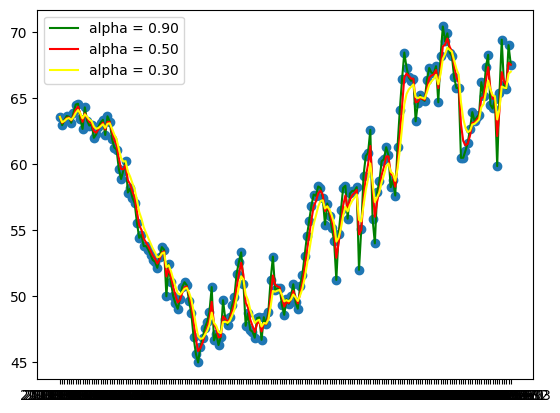

In [28]:
plt.scatter(df_tail["date"],df_tail["ewma_temp_1"])
plt.plot(df_tail["date"],ewma_data_1,color = "green" ,label = "alpha = 0.90")
plt.plot(df_tail["date"],ewma_data_2,color = "red" ,label = "alpha = 0.50")
plt.plot(df_tail["date"],ewma_data_3,color = "yellow" ,label = "alpha = 0.30")
plt.legend()
plt.show()